In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set directories

pond_inlet_stats = "/cs/student/projects2/aisd/2024/tcannon/dissertation/Dissertation/figures/final_val_pondinlet/reconstruction_statistics/patch_reconstruction_stats.csv"
cambridge_stats = "/cs/student/projects2/aisd/2024/tcannon/dissertation/Dissertation/figures/final_test_cambridge/reconstruction_statistics/patch_reconstruction_stats.csv"
tuktoyaktuk_stats = "/cs/student/projects2/aisd/2024/tcannon/dissertation/Dissertation/figures/final_val_tuk/reconstruction_statistics/patch_reconstruction_stats.csv"

In [3]:
# Read as dataframe

df_pondinlet = pd.read_csv(pond_inlet_stats)
df_pondinlet.head()

df_cambridge = pd.read_csv(cambridge_stats)
df_cambridge.head()

df_tuktoyaktuk = pd.read_csv(tuktoyaktuk_stats)
df_tuktoyaktuk.head()

,tile_id,valid_pixel_count,rmse_phys_m,bias_phys_m,sigma_error_pct,corr_length_error_pct,normal_angle_error_deg,jsd,psd_rmse,abs_rel_error,gt_mean_val,gt_std_val,pred_mean_val,pred_std_val,gt_min_val,gt_max_val,pred_min_val,pred_max_val
0,5483,64719,0.119402,0.002946,12.452699,7.137478,2.144577,0.089802,0.505583,0.657192,0.156456,0.206953,0.159402,0.181181,-0.1200,1.658750,-0.056185,1.180314
1,5484,64623,0.131471,0.026930,3.180223,24.641306,2.057339,0.065355,0.439860,0.983072,0.130264,0.164859,0.157194,0.159617,-0.1075,1.591250,-0.040527,1.427277
2,5485,64919,0.145325,0.001523,11.380045,22.609814,2.728239,0.015904,0.486726,0.840544,0.174906,0.214479,0.176429,0.190071,-0.1350,1.910000,-0.075979,1.312825
3,5486,64535,0.094654,0.012413,32.443798,8.530240,1.596552,0.160573,0.586478,0.873436,0.065236,0.137385,0.077649,0.092812,-0.1075,2.113125,-0.041288,1.046993
4,5487,65006,0.146105,0.006364,14.754648,4.180957,2.748508,0.037903,0.642379,0.783100,0.218002,0.214748,0.224367,0.183063,-0.1250,1.715000,-0.069079,1.289756


In [ ]:
# Calculate NRMSE

#df_cambridge['nrmse'] = df_cambridge['rmse_phys_m'] / (df_cambridge['gt_max_val'] - df_cambridge['gt_min_val'])
#df_pondinlet['nrmse'] = df_pondinlet['rmse_phys_m'] / (df_pondinlet['gt_max_val'] - df_pondinlet['gt_min_val'])
#df_tuktoyaktuk['nrmse'] = df_tuktoyaktuk['rmse_phys_m'] / (df_tuktoyaktuk['gt_max_val'] - df_tuktoyaktuk['gt_min_val'])

In [ ]:
# Stack tuk and pondinlet into val dataframe

df_val = pd.concat([df_pondinlet, df_tuktoyaktuk], ignore_index=True)

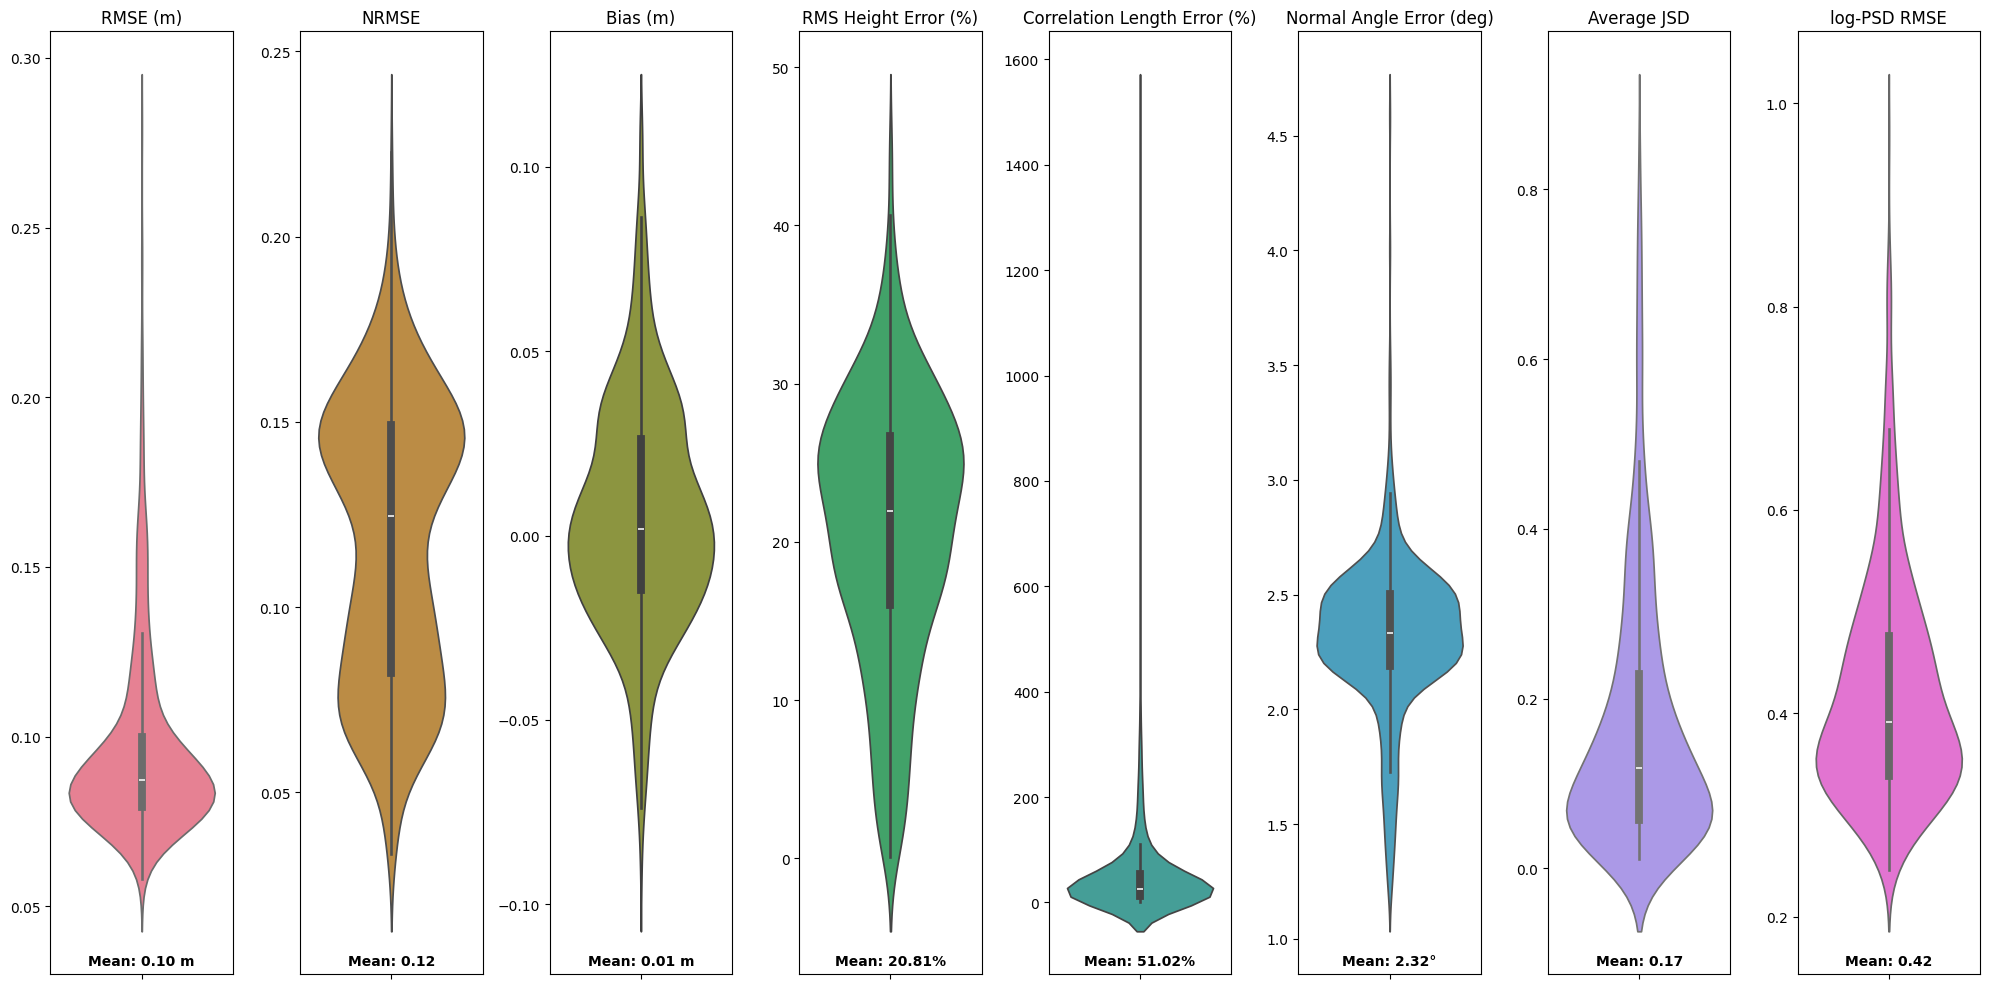

In [ ]:
# Create side by side boxplots 

metric_column_names = ['rmse_phys_m', 'bias_phys_m','sigma_error_pct', 'corr_length_error_pct', 'normal_angle_error_deg','jsd', 'psd_rmse']
metric_column_dict = {
    'rmse_phys_m': 'RMSE (m)',
    #'nrmse': 'NRMSE',
    'bias_phys_m': 'Bias (m)',
    'sigma_error_pct': 'RMS Height Error (%)',
    'corr_length_error_pct': 'Correlation Length Error (%)',
    'normal_angle_error_deg': 'Normal Angle Error (deg)',
    'jsd': 'Average JSD',
    'psd_rmse': 'log-PSD RMSE'
}

metric_units_dict = {
    'rmse_phys_m': ' m',
    #'nrmse': '',
    'bias_phys_m': ' m',
    'sigma_error_pct': '%',
    'corr_length_error_pct': '%',
    'normal_angle_error_deg': '°',
    'jsd': '',
    'psd_rmse': ''
}

fig, axes = plt.subplots(1, len(metric_column_names), figsize=(20, 10))
axes = axes.flatten()
# give each a different color
colors = sns.color_palette("husl", len(metric_column_names))
for i, metric in enumerate(metric_column_names):
    sns.violinplot(y=df_val[metric], ax=axes[i], color=colors[i])
    axes[i].set_title(f'{metric_column_dict[metric]}')
    axes[i].set_ylabel("")
    # Annotate with average value
    mean_value = df_val[metric].mean()
    axes[i].annotate(f'Mean: {mean_value:.2f}{metric_units_dict[metric]}', xy=(0.5, 0.01), xycoords='axes fraction', ha='center', fontsize=10, color='black',fontweight="bold")
plt.tight_layout()
plt.show()


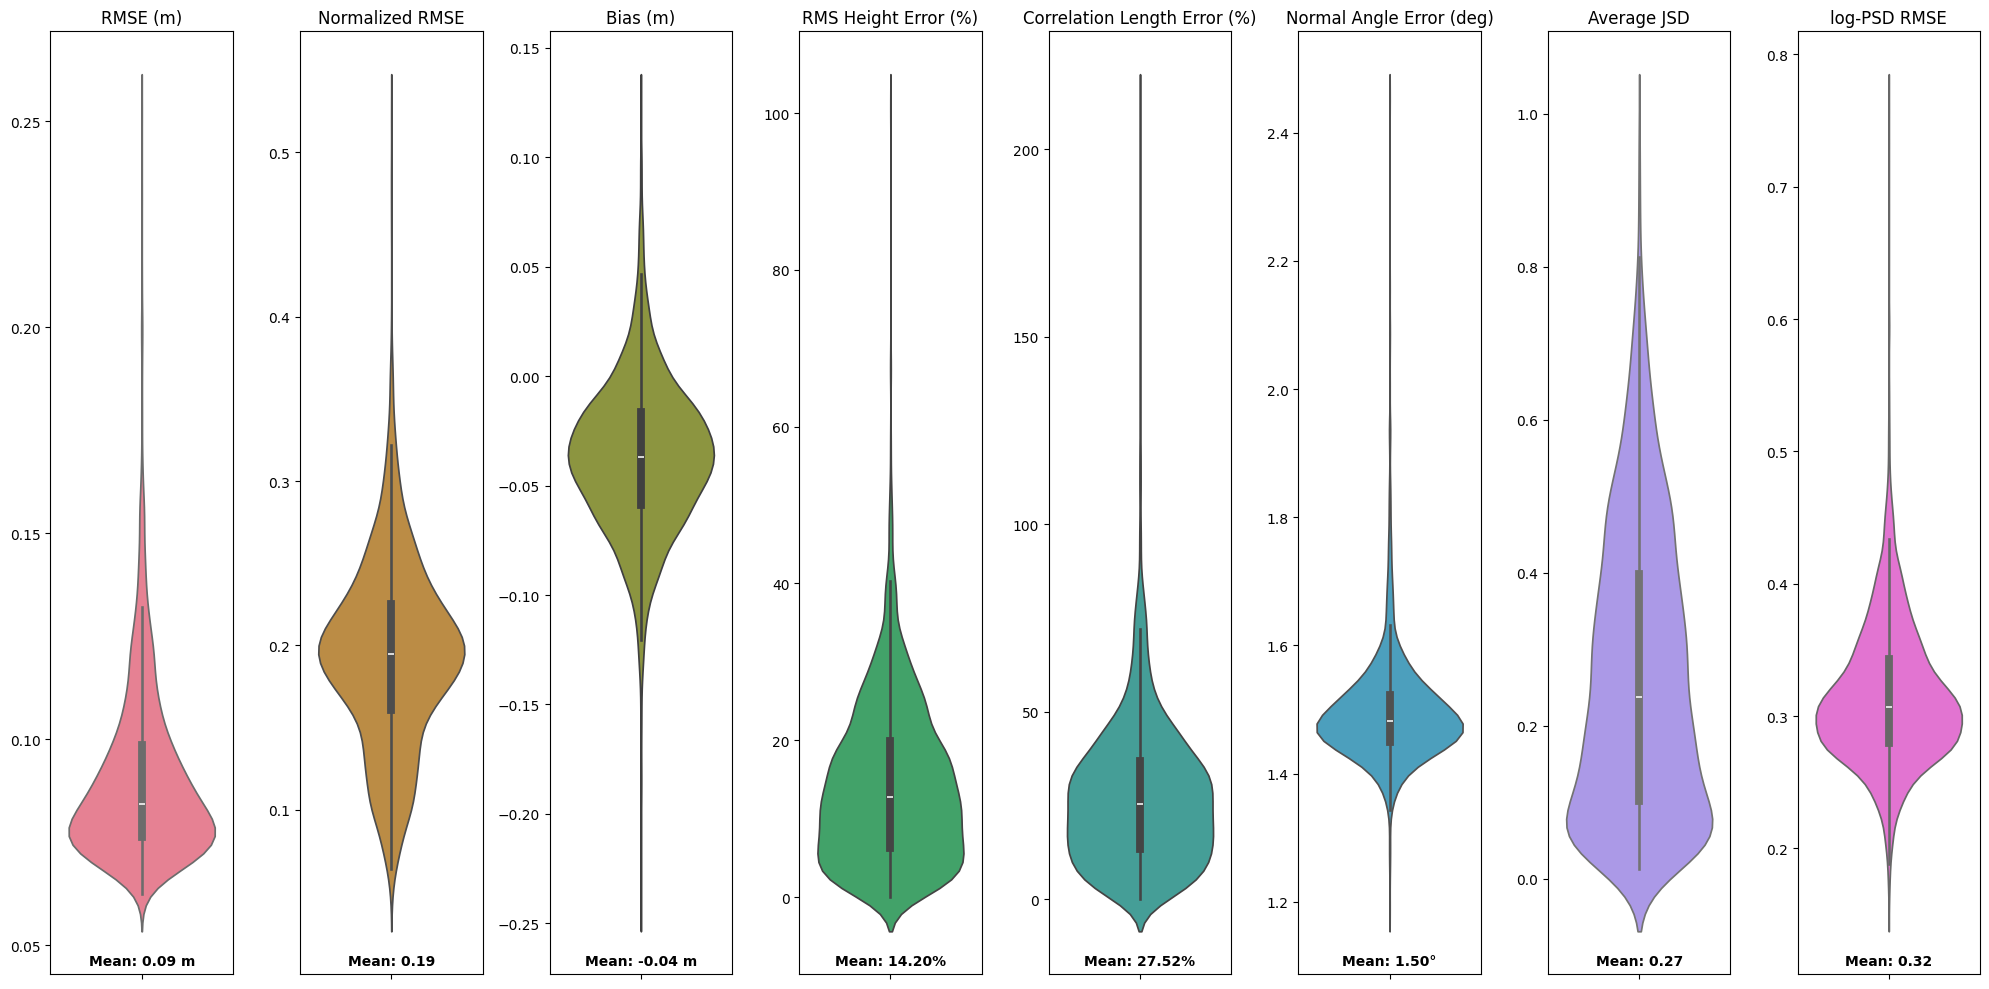

In [ ]:
# Create side by side boxplots 

metric_column_names = ['rmse_phys_m', 'bias_phys_m','sigma_error_pct', 'corr_length_error_pct', 'normal_angle_error_deg','jsd', 'psd_rmse']
metric_column_dict = {
    'rmse_phys_m': 'RMSE (m)',
    #'nrmse': 'Normalized RMSE',
    'bias_phys_m': 'Bias (m)',
    'sigma_error_pct': 'RMS Height Error (%)',
    'corr_length_error_pct': 'Correlation Length Error (%)',
    'normal_angle_error_deg': 'Normal Angle Error (deg)',
    'jsd': 'Average JSD',
    'psd_rmse': 'log-PSD RMSE'
}

metric_units_dict = {
    'rmse_phys_m': ' m',
    #'nrmse': '',
    'bias_phys_m': ' m',
    'sigma_error_pct': '%',
    'corr_length_error_pct': '%',
    'normal_angle_error_deg': '°',
    'jsd': '',
    'psd_rmse': '',
}

fig, axes = plt.subplots(1, len(metric_column_names), figsize=(20, 10))
axes = axes.flatten()
# give each a different color
colors = sns.color_palette("husl", len(metric_column_names))
for i, metric in enumerate(metric_column_names):
    sns.violinplot(y=df_cambridge[metric], ax=axes[i], color=colors[i])
    axes[i].set_title(f'{metric_column_dict[metric]}')
    axes[i].set_ylabel("")
    # Annotate with average value
    mean_value = df_cambridge[metric].mean()
    axes[i].annotate(f'Mean: {mean_value:.2f}{metric_units_dict[metric]}', xy=(0.5, 0.01), xycoords='axes fraction', ha='center', fontsize=10, color='black',fontweight="bold")
plt.tight_layout()
plt.show()


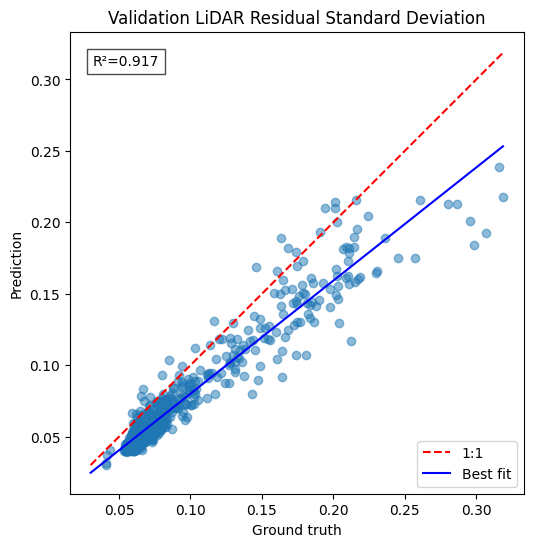

In [ ]:
# Scatterplot of gt std vs pred std

x = df_val["gt_std_val"] 
y = df_val["pred_std_val"]  

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.5)

# 1:1 line
mn, mx = np.nanmin([x, y]), np.nanmax([x, y])
plt.plot([mn, mx], [mn, mx], 'r--', label='1:1')

# best-fit line
mask = ~np.isnan(x) & ~np.isnan(y)
z = np.polyfit(x[mask], y[mask], 1)
p = np.poly1d(z)
xs = np.array([mn, mx])
plt.plot(xs, p(xs), 'b-', label=f'Best fit')

# R^2
r2 = np.corrcoef(x[mask], y[mask])[0,1]**2
plt.text(0.05, 0.95, f'R²={r2:.3f}', transform=plt.gca().transAxes,
         va='top', bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel('Ground truth')
plt.ylabel('Prediction')
plt.title("Validation LiDAR Residual Standard Deviation")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  
plt.show()

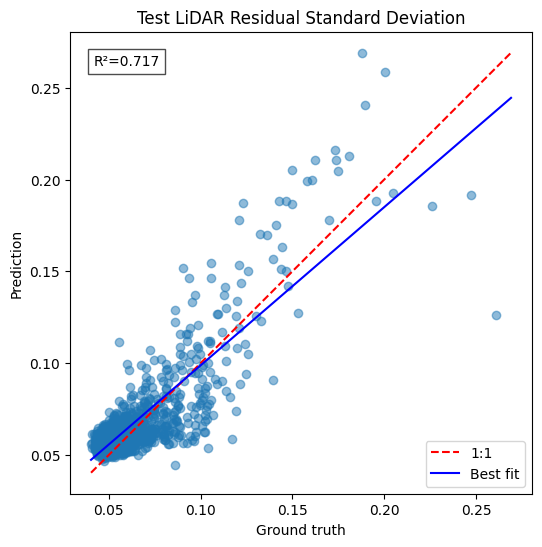

In [ ]:
# Scatterplot of gt std vs pred std

x = df_cambridge["gt_std_val"]  
y = df_cambridge["pred_std_val"]  

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.5)

# 1:1 line
mn, mx = np.nanmin([x, y]), np.nanmax([x, y])
plt.plot([mn, mx], [mn, mx], 'r--', label='1:1')

# best-fit line
mask = ~np.isnan(x) & ~np.isnan(y)
z = np.polyfit(x[mask], y[mask], 1)
p = np.poly1d(z)
xs = np.array([mn, mx])
plt.plot(xs, p(xs), 'b-', label=f'Best fit')

# R^2
r2 = np.corrcoef(x[mask], y[mask])[0,1]**2
plt.text(0.05, 0.95, f'R²={r2:.3f}', transform=plt.gca().transAxes,
         va='top', bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel('Ground truth')
plt.ylabel('Prediction')
plt.title("Test LiDAR Residual Standard Deviation")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  
plt.show()